## 3-7-2資料分群處理
（一）、設計說明：
1. 請撰寫一程式，利用sklearn.datasets裡的make_blobs函式產生出資料。總樣本數200，樣本中心數4，資料集的標準差為0.50，隨機種子為0。(make_blobs會生成各向同性的高斯斑點以進行分群)。
2. 請利用K-means 演算法分群（K-means Clustering）來做分群。 
3. 使用集群內誤差平方和（kmeans.inertia_）來判斷分群數量為何值是比較恰當的，值大於90以上的納入計算。其中K-means內的參數（分群中心）初始化為「k-means++」，K-means演算法的隨機運作次數為「15」，隨機產生中心的隨機序列（random state=0），最大迭代次數為200。

（二）、請依序回答下列問題：
1. 請使用集群內誤差平方和（kmeans.inertia_）來判斷分群數量，需取值大於90以上者納入計算，可分為幾群？
2. 承上題，只取集群內誤差平方和分數大於90以上的數據，請依據計算後之數據，填入正確的選項（選項內兩組數據需完全相同）？
(A) [1749.6046, 94.0224]
(B) [1774.5460, 736.9635]
(C) [1794.0460, 304.9484]
(D) [736.9635, 901.0224]

3. 請輸入分群後最小中心點X的位置（四捨五入取至小數點後第四位）？
4. 請輸入分群後最大中心點Y的位置（四捨五入取至小數點後第四位）？


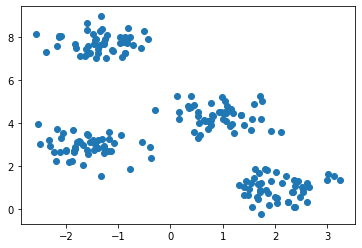

In [1]:
# 導入需要套件
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

#  載入scikit-learn資料集範例資料
X, y = make_blobs(n_samples=200, 
                  centers=4,    #分成四群
                  cluster_std=0.50,   #標準差
                  random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [2]:
#inertia_集群內誤差平方和，做轉折判斷法的依據
Wcss_data = []
for i in range(1, 8):
    #實作
    kmeans = KMeans(n_clusters=i, #分i群
                    init='k-means++', 
                    max_iter=200, 
                    n_init=15, 
                    random_state=0)
    kmeans.fit(X)
    Wcss_data.append(kmeans.inertia_)
print(Wcss_data)

[1794.0460266445257, 736.86391422994, 304.9484842599343, 94.02242630751765, 84.45701261628774, 76.29514182274326, 68.22636236554473]


可以發現：i越大，集群內誤差平方和越小
接下來根據要求，取值大於90以上者納入計算，此時的i=4

In [3]:
# 建立i=4的kmeans分群器
kmeans = KMeans(n_clusters=4, 
                init='k-means++', 
                max_iter=200, 
                n_init=15, 
                random_state=0)
kmeans_fit=kmeans.fit(X)

In [4]:
# 顯示各群中心點
print("cluster_centers=\n",kmeans.cluster_centers_)

cluster_centers=
 [[-1.60782913  2.9162828 ]
 [-1.33173192  7.7400479 ]
 [ 2.06911036  0.96146833]
 [ 0.91932803  4.34824615]]
